In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [69]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test2 = test_df.copy()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
len(train_df)

891

In [29]:
len(test_df)

418

In [30]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


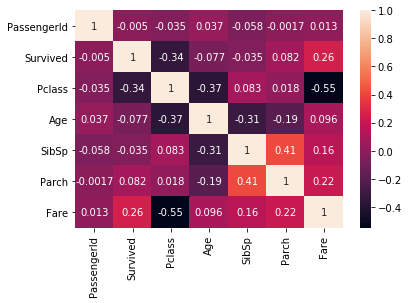

In [31]:
##Making correlation matrix for the data

sns.heatmap(train_df.corr(),annot=True)

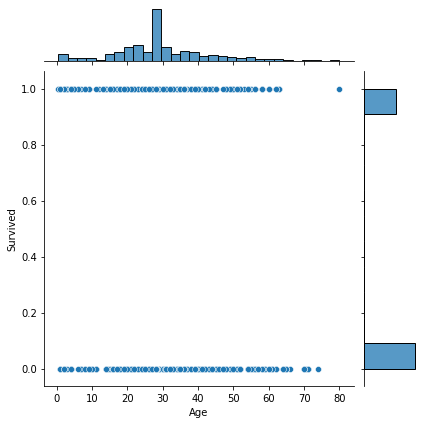

In [91]:
sns.jointplot(data = train_df, x = "Age", y = 'Survived')

##Looks like mostly 30 year olds died
#And also less kids

In [32]:
##Testing my theory from the correlation matrix

import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols(" Q('Survived') ~ Q('Fare') ", data=train_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q('Survived')   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     63.03
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           6.12e-15
Time:                        17:07:21   Log-Likelihood:                -591.44
No. Observations:                 891   AIC:                             1187.
Df Residuals:                     889   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3027      0.019     16.114      0.000       0.266       0.340
Q('Fare')      0.0025      0.000      7.939      0.000       0.002       0.003
==============================================================================
Omnibus:                     5596.359   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.732
Skew:                           0.490   Prob(JB):                     4.98e-28
Kurtosis:                       1.443   Cond. No.                         70.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

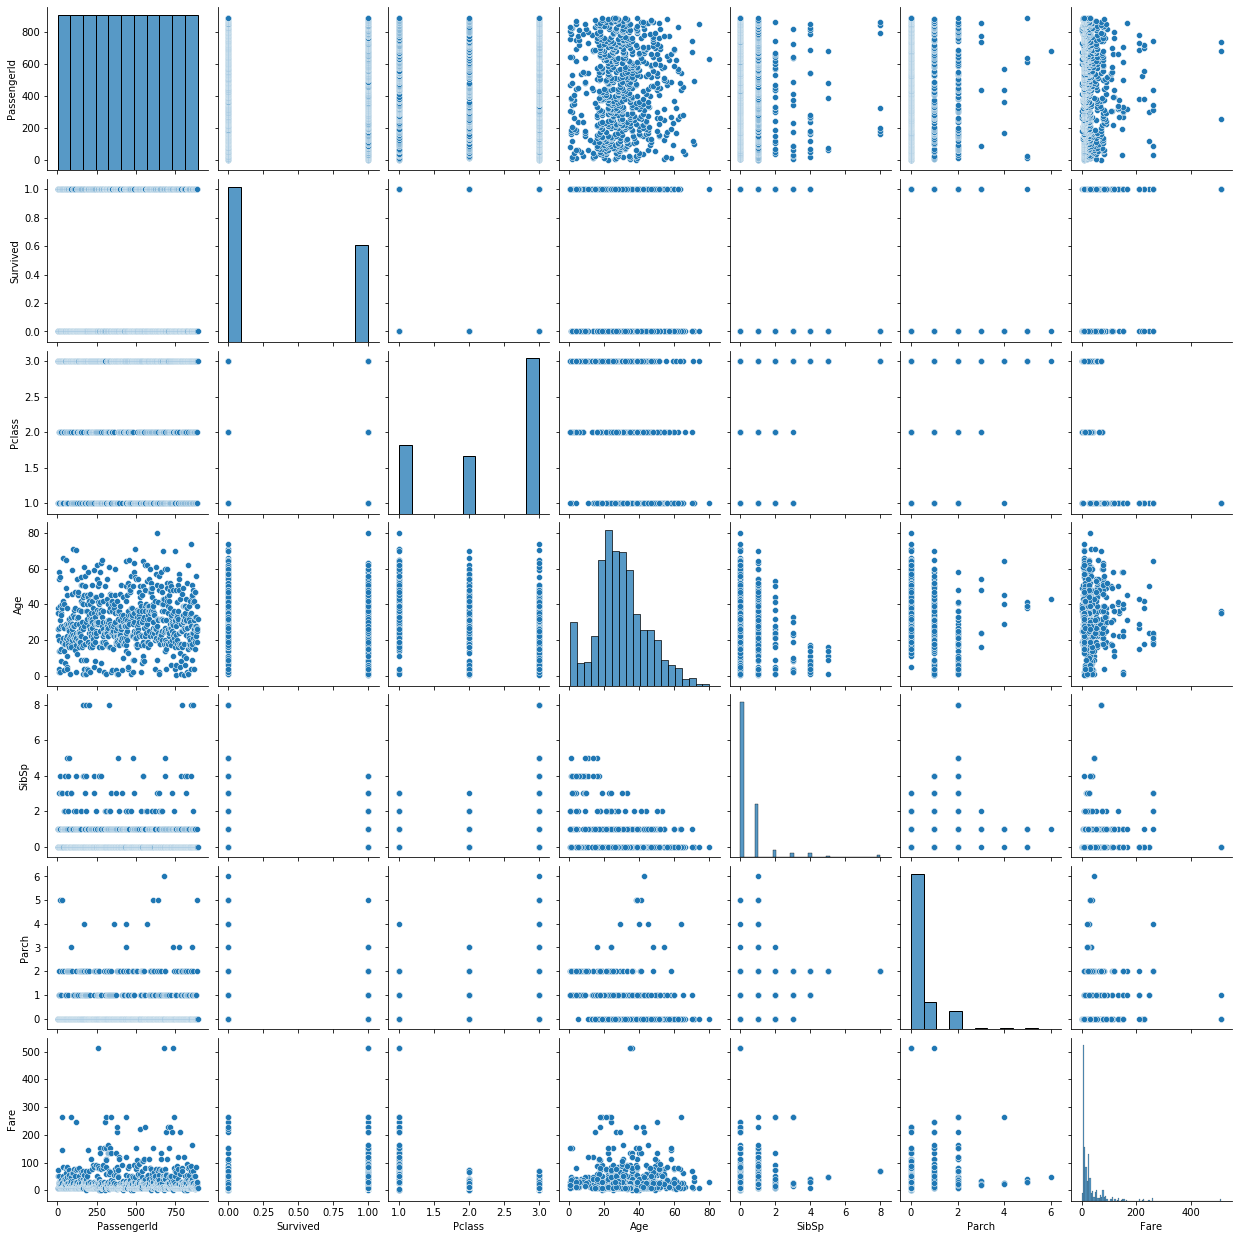

In [33]:
##Visual representation of the data

sns.pairplot(train_df)

In [34]:
##Beginning to clean the data

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
## Inspiration for data cleaning: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
# Putting median for age, and mode for embarked

train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)


test_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace = True)

col_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
train_df.drop(col_drop, axis = 1, inplace = True)
test_df.drop(col_drop, axis = 1, inplace = True)

#https://www.kaggle.com/ash316/eda-to-prediction-dietanic
#Converting strings into numeric values so that they can be used
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

train_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

test_df2 = test_df.round(0)
train_df2 = train_df.round(0)

In [71]:
test_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.0,0,0,8.0,2
1,3,1,47.0,1,0,7.0,0
2,2,0,62.0,0,0,10.0,2
3,3,0,27.0,0,0,9.0,0
4,3,1,22.0,1,1,12.0,0


In [72]:
train_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.0,0
1,1,1,1,38.0,1,0,71.0,1
2,1,3,1,26.0,0,0,8.0,0
3,1,1,1,35.0,1,0,53.0,0
4,0,3,0,35.0,0,0,8.0,0


In [81]:
##Beginning to split DataFrame, and start Modeling

y = pd.DataFrame(train_df2['Survived'])

X = pd.DataFrame(train_df2[['Pclass',  'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']])

X2 = pd.DataFrame(test_df2[['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']])

#Check for missing values, dont have any
incomp = X2[X2.isnull().any(axis=1)].head()
incomp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [82]:
##Logistic Regression
# https://www.kaggle.com/ash316/eda-to-prediction-dietanic
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)
prediction = model.predict(X2)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=5, n_jobs=-1)
print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))

Accuracy: 79.24% (+/- 3.69)


In [89]:
## Code for output: https://www.kaggle.com/alexisbcook/titanic-tutorial

output = pd.DataFrame({'PassengerId': test2.PassengerId, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)

##Kaggle Score: .76555
 Puts me in 136 place##